In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [19]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [20]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first() 



('2017-08-23',)

Date 1 year ealier: 2016-08-23


<Axes: xlabel='Date', ylabel='Inches'>

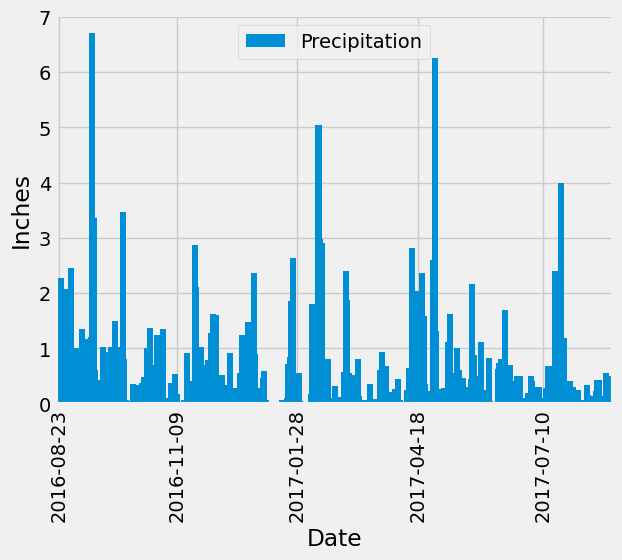

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
print("Date 1 year ealier:",dt.date(2017, 8, 23) - dt.timedelta(days=365))

# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= (dt.date(2017, 8, 23) - dt.timedelta(days=365)))

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame([(entry.date, entry.prcp) for entry in prcp_results], columns=['Date', 'Precipitation'])

# Sort the dataframe by date
date_df = prcp_df.groupby(['Date']).max()

# Use Pandas Plotting with Matplotlib to plot the data
graph = date_df.plot(kind='bar',width = 4, ylabel='Inches')
graph.set_xticks([0,78,158,238,321])
graph

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset
session.query(Stations.station).count()

9

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order. 
station_list = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
print(station_list[0][0],"has the gratest number of observations")
station_list

USC00519281 has the gratest number of observations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)).filter(Measurements.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='Temperature', ylabel='Frequency'>

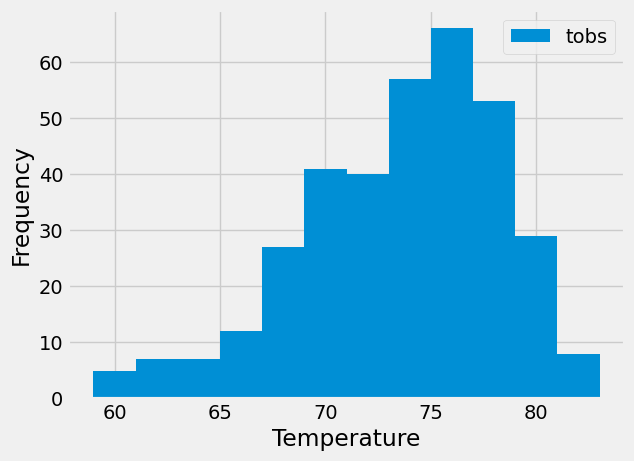

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_results = session.query(Measurements.tobs).filter(Measurements.date >= (dt.date(2017, 8, 23) - dt.timedelta(days=365)), Measurements.station == 'USC00519281')
temp_df = pd.DataFrame([(entry.tobs) for entry in temp_results], columns=['tobs'])
temp_df.plot(kind='hist', bins=12, width = 2, xlabel='Temperature')


# Close Session

In [29]:
# Close Session
session.close()